In [ ]:
#downloading the data from github

wget https://raw.githubusercontent.com/balazek/deep-learning-course/master/Netflix_train.csv

wget https://raw.githubusercontent.com/balazek/deep-learning-course/master/Netflix_test.csv

In [2]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#importing the dataset

# load the file contents 
dataset_train = pd.read_csv('Netflix_train.csv')

In [4]:
#showing the data
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-07-31,6.194286,6.348571,6.192857,6.277143,6.277143,7630000
1,2009-08-03,6.335714,6.424286,6.258572,6.424286,6.424286,8444100
2,2009-08-04,6.400000,6.414286,6.235714,6.311429,6.311429,8518300
3,2009-08-05,6.338572,6.357143,6.245714,6.330000,6.330000,6419700
4,2009-08-06,6.285714,6.355714,6.200000,6.214286,6.214286,7716100


In [5]:
# Create a subtable called "training_set"
# Reading the first column
training_set = dataset_train.iloc[:, 1:2].values 

In [6]:
#showing the all data from first column
training_set

array([[  6.194286],
       [  6.335714],
       [  6.4     ],
       ...,
       [328.790009],
       [335.980011],
       [329.200012]])

In [7]:
# Feature Scaling

# import the MinMaxScaler from scikit learn
from sklearn.preprocessing import MinMaxScaler

In [8]:
# create a scaler instance to rescale all data to the range of 0.0 to 1.0 
sc = MinMaxScaler(feature_range = (0, 1))

In [9]:
#Fitting a scaler to the data set
training_set_scaled = sc.fit_transform(training_set)

In [10]:
#Showing the scaled data
training_set_scaled

array([[0.00112731],
       [0.00146757],
       [0.00162223],
       ...,
       [0.77724278],
       [0.79454081],
       [0.77822918]])

In [11]:
# Creating a data structure with 90 timesteps and 1 output

# the 90 stock prices 
X_train = [] 

In [12]:
#showing the days worth of data and number of columns
training_set_scaled.shape

(2516, 1)

In [13]:
# the stock price today
y_train = [] 

In [14]:
# creating the foor-loop and appending the values

for i in range(90, 2516): 
    X_train.append(training_set_scaled[i-90:i, 0]) 
    y_train.append(training_set_scaled[i, 0])

In [15]:
#converting tables to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [16]:
#showing the numpy array
X_train

array([[0.00112731, 0.00146757, 0.00162223, ..., 0.00653359, 0.00619677,
        0.0058084 ],
       [0.00146757, 0.00162223, 0.00147444, ..., 0.00619677, 0.0058084 ,
        0.00528942],
       [0.00162223, 0.00147444, 0.00134727, ..., 0.0058084 , 0.00528942,
        0.00549564],
       ...,
       [0.86772659, 0.84970683, 0.88601103, ..., 0.73550134, 0.73326392,
        0.75335267],
       [0.84970683, 0.88601103, 0.89070246, ..., 0.73326392, 0.75335267,
        0.77724278],
       [0.88601103, 0.89070246, 0.84992335, ..., 0.75335267, 0.77724278,
        0.79454081]])

In [17]:
# Reshaping the data matrix and adding extra dimension
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [20]:
# Initialising the RNN as a sequence of layers
regressor = Sequential()

In [21]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True, input_shape =  (X_train.shape[1], 1)))

In [22]:
#adding the dropout
# the argument is the dropout rate to ignore in the layers (20%), 
# i.e. 50 units * 20% = 10 units will be dropped each time
regressor.add(Dropout(0.2))


In [25]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [26]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [27]:
# Adding a fourth LSTM layer and some Dropout regularisation
# we removed the return_sequences because we no longer return a 
# sequence but a value instead
regressor.add(LSTM(units = 50))
#adding the dropout
regressor.add(Dropout(0.2))

In [28]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [29]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [30]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
76/76 [==============================] - 21s 277ms/step - loss: 0.0128
Epoch 2/100
76/76 [==============================] - 17s 222ms/step - loss: 0.0032
Epoch 3/100
76/76 [==============================] - 17s 225ms/step - loss: 0.0023
Epoch 4/100
76/76 [==============================] - 16s 214ms/step - loss: 0.0026
Epoch 5/100
76/76 [==============================] - 15s 192ms/step - loss: 0.0023
Epoch 6/100
76/76 [==============================] - 17s 221ms/step - loss: 0.0024
Epoch 7/100
76/76 [==============================] - 24s 317ms/step - loss: 0.0021
Epoch 8/100
76/76 [==============================] - 18s 237ms/step - loss: 0.0018
Epoch 9/100
76/76 [==============================] - 14s 181ms/step - loss: 0.0019
Epoch 10/100
76/76 [==============================] - 12s 163ms/step - loss: 0.0020
Epoch 11/100
76/76 [==============================] - 13s 174ms/step - loss: 0.0017
Epoch 12/100
76/76 [==============================] - 13s 171ms/step - loss: 0.0017
E

In [31]:
# Getting the real stock price for 2019-08-01- 
# 2019-08-31
dataset_test = pd.read_csv('Netflix_test.csv')
#printing the data
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-01,324.250000,328.579987,318.739990,319.500000,319.500000,6563200
1,2019-08-02,317.489990,319.410004,311.799988,318.829987,318.829987,6280300
2,2019-08-05,310.959991,313.420013,304.679993,307.630005,307.630005,8692500
3,2019-08-06,310.579987,311.880005,305.299988,310.100006,310.100006,6179100
4,2019-08-07,302.559998,305.000000,296.809998,304.290009,304.290009,9322400
5,2019-08-08,311.029999,316.359985,306.630005,315.899994,315.899994,5905900
6,2019-08-09,313.739990,316.640015,305.679993,308.929993,308.929993,5349100
7,2019-08-12,305.459991,312.890015,303.239990,310.829987,310.829987,6531700
8,2019-08-13,309.769989,316.429993,308.160004,312.279999,312.279999,5289400
9,2019-08-14,308.010010,308.410004,298.010010,299.109985,299.109985,7355800


In [32]:
#Selecting the column
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.size

22

In [33]:
#printing the data
real_stock_price

array([[324.25    ],
       [317.48999 ],
       [310.959991],
       [310.579987],
       [302.559998],
       [311.029999],
       [313.73999 ],
       [305.459991],
       [309.769989],
       [308.01001 ],
       [299.5     ],
       [298.859985],
       [306.25    ],
       [304.570007],
       [301.609985],
       [298.649994],
       [295.      ],
       [295.23999 ],
       [294.540009],
       [289.470001],
       [295.      ],
       [298.779999]])

In [34]:
# Getting the predicted stock price of 2019

#concatinaning dataset_train
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0) 

In [35]:
#showing the number of records
dataset_total.size


2538

In [36]:
#creating dataset_total
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 90:].values

In [37]:
#showing the inputs size
inputs.size

112

In [38]:
# reshaping the data

inputs = inputs.reshape(-1,1) 

# applying the feature scaler
inputs = sc.transform(inputs)

In [39]:
# Getting the predicted stock price of 2019
X_test = []

In [40]:
# creating the foor-loop and appending the values
for i in range(90, 112): 
    X_test.append(inputs[i-90:i, 0])


In [41]:
#converting to np array
X_test = np.array(X_test) 

In [42]:
# creating a 3D structure
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [43]:
#predicting the values
predicted_stock_price = regressor.predict(X_test)

In [44]:
# invers transformation
predicted_stock_price = sc.inverse_transform(predicted_stock_price) 
predicted_stock_price.size

22

### Result Visualization


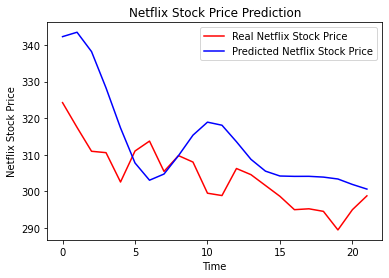

In [45]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Netflix Stock Price')

plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Netflix Stock Price')

plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend()

plt.show()